In [49]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

In [50]:
from sklearn.datasets import load_wine
wine = load_wine()

In [51]:
wine_dataset = load_wine()

In [52]:
wine_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [53]:
print(wine_dataset.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [54]:
df = pd.DataFrame(wine_dataset['data'], columns=wine_dataset['feature_names'])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [55]:
#Standerdization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)


StandardScaler()

In [56]:
scaled_data = scaler.transform(df)

In [57]:
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [58]:
## Applying PCA algorithm
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_data)

PCA(n_components=3)

In [59]:
PCA_data = pca.fit_transform(scaled_data)

In [60]:
PCA_data

array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00,  2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00,  8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00,  2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00,  1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00,  1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00,  9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00,  7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00,  1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00,  6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00,  6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00,  1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00,  2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00,  1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00,  2.32730534e+00

In [61]:
pca.explained_variance_

array([4.73243698, 2.51108093, 1.45424187])

In [62]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631])

Text(0, 0.5, 'Second Principal Component')

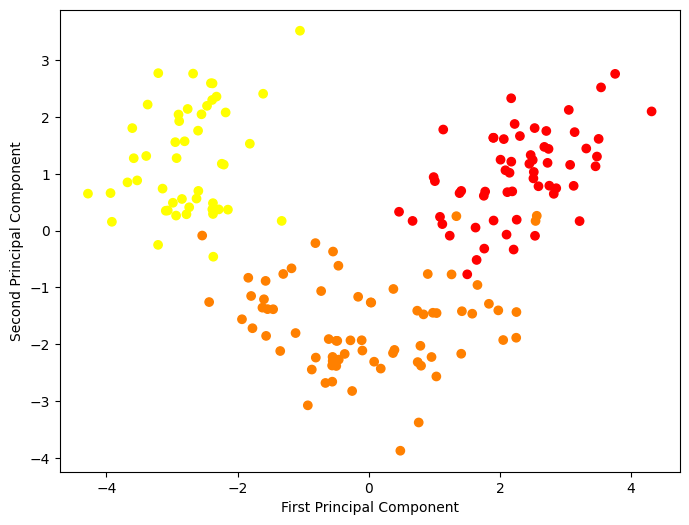

In [71]:
 plt.figure(figsize=(8,6))
plt.scatter(PCA_data[:,0],PCA_data[:,1],c=wine_dataset['target'], cmap='autumn')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')